![title](UCN ICI.png)

 #  <font color= #007FFF> Regresion Lineal - Simple </font>

<div class="alert alert-info"> </h4> **Material preparado para el Master en Ingeniería Civil Industrial | Universidad Católica del Norte | Antofasta | Curso - Predictive Analytics.**
</h4> </div>

In [1]:
# Importando las librerias que utilizaremos:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn

In [2]:
df = pd.read_csv('Regresion_basic.csv',index_col=['Id'] )
print("La forma del archivo es: "+str(df.shape))
df.head() # Cuando son muchos datos puede imprimirse usando df.head()

La forma del archivo es: (100, 6)


,Cpl,Dist,LdTime,TrlLng,Wgt,Equpt
Id,,,,,,
1,3692,1579,1,53,20559,DRY
2,3279,1298,12,48,17025,REF
3,3120,1382,11,48,26735,DRY
4,3205,1033,1,53,26175,DRY
5,3188,1320,3,53,17994,DRY


Se quiere poder saber la relación entre los datos... por ejemplo están relacionados Cpl y Dist ? Debiese, pero realmente lo están. 

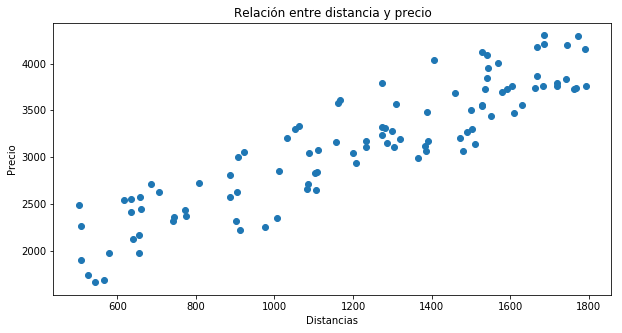

In [3]:
plt.figure(figsize=(10,5))
plt.scatter(df['Dist'],df['Cpl'])
plt.xlabel("Distancias")
plt.ylabel("Precio")
plt.title("Relación entre distancia y precio")
plt.show()

In [4]:
x = df.Dist.values
y = df.Cpl.values

In [5]:
x

array([1579, 1298, 1382, 1033, 1320, 1103,  743,  772, 1389, 1761, 1664,
       1542,  641, 1527, 1407, 1720, 1310,  565, 1200, 1207, 1273, 1629,
        911,  525,  658, 1719, 1569,  908, 1510,  543, 1528, 1007, 1366,
       1162, 1086, 1793, 1542, 1082, 1767, 1234, 1280, 1491,  655, 1390,
        707, 1503,  886, 1790, 1385, 1273,  901,  887, 1234,  905,  618,
       1087, 1683, 1772, 1529, 1157, 1501, 1669, 1687, 1610, 1011, 1051,
       1303, 1669, 1111, 1605, 1472,  507,  741,  634,  774,  975, 1107,
       1273, 1591, 1552, 1544,  634,  922, 1286, 1537,  508,  578, 1105,
       1460, 1744,  659, 1479, 1743,  686, 1167, 1062,  502,  809,  655,
       1687])

In [6]:
y

array([3692, 3279, 3120, 3205, 3188, 2835, 2364, 2434, 3486, 3730, 3735,
       4096, 2123, 3560, 4041, 3765, 3565, 1686, 3045, 2933, 3240, 3557,
       2217, 1735, 2573, 3795, 4006, 2999, 3136, 1660, 3547, 2346, 2988,
       3576, 2714, 3756, 3841, 2658, 3738, 3171, 3312, 3265, 2162, 3171,
       2632, 3303, 2812, 4150, 3065, 3793, 2317, 2578, 3106, 2631, 2545,
       3046, 3755, 4290, 4124, 3161, 3500, 3865, 4301, 3474, 2853, 3302,
       3108, 4181, 3079, 3758, 3202, 1905, 2319, 2549, 2366, 2252, 2836,
       3320, 3729, 3444, 3954, 2416, 3057, 3154, 3730, 2261, 1979, 2648,
       3682, 4193, 2440, 3070, 3830, 2715, 3608, 3330, 2489, 2722, 1978,
       4208])

In [7]:
length=100
x = x.reshape(length, 1)
y = y.reshape(length, 1)

In [8]:
from sklearn.linear_model import LinearRegression

In [42]:
X=df['Dist']
Y=df['Cpl']

In [46]:
X=X.reshape(100, 1)
Y=Y.reshape(100, 1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [47]:
lr = LinearRegression()
model=lr.fit(X, Y)
prediccion=lr.predict(X)

In [48]:
print("Coeficiente de x es: "+str(model.coef_))
print("Intercepto  es: "+str(model.intercept_))

Coeficiente de x es: [[ 1.53184787]]
Intercepto  es: [ 1282.38388874]


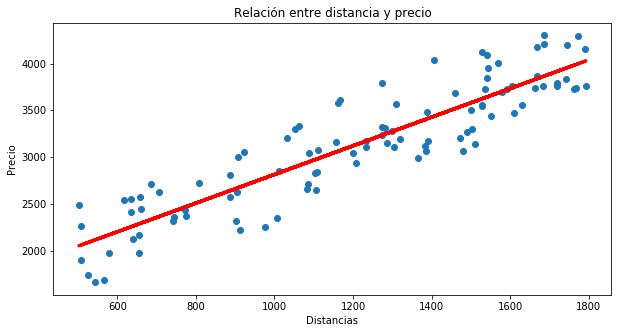

In [52]:
# plot it as in the example at http://scikit-learn.org/
plt.figure(figsize=(10,5))
plt.scatter(X, Y)
plt.plot(X, prediccion, color='red', linewidth=3)

plt.xlabel("Distancias")
plt.ylabel("Precio")
plt.title("Relación entre distancia y precio")

plt.show()

 #  <font color= #007FFF> $R^2$ y Error Cuadrático Medio </font>

###  <font color='#2d89ef'> Overfitting & Underfitting</font>

En estadística y Machine Learning generalmente dividimos nuestros datos en dos subconjuntos: datos de entrenamiento y datos de prueba (y a veces en tres: entrenar, validar y probar), y ajustamos nuestro modelo en los datos del tren, para hacer predicciones sobre Los datos de prueba. Cuando hacemos eso, puede suceder una de las dos cosas: Overfitting nuestro modelo o Underfitting nuestro modelo. No queremos que suceda ninguna de estas cosas, ya que afectan la previsibilidad de nuestro modelo: podríamos estar usando un modelo que tenga una precisión más baja y / o no esté generalizado (lo que significa que no puede generalizar sus predicciones en otros datos). Veamos qué significa realmente Underfitting y Overfitting:

**Overfitting**

El overfitting significa que el modelo que entrenamos se ha entrenado "demasiado bien" y ahora se ajusta demasiado al conjunto de datos de entrenamiento. Esto suele suceder cuando el modelo es demasiado complejo (es decir, demasiadas características / variables en comparación con el número de observaciones). Este modelo será muy preciso en los datos de entrenamiento, pero probablemente no será muy preciso en los datos nuevos o no entrenados. Esto se debe a que este modelo no está generalizado (o no tan generalizado), lo que significa que puede generalizar los resultados y no hacer inferencias sobre otros datos, que es, en última instancia, lo que está tratando de hacer. Básicamente, cuando esto sucede, el modelo aprende o describe el "ruido" en los datos de entrenamiento en lugar de las relaciones reales entre las variables en los datos. Este ruido, obviamente, no forma parte de ningún conjunto de datos nuevo y no se puede aplicar a él.


**Underfitting**

En contraste con el overfitting, cuando un modelo está Underfitting, significa que el modelo no se ajusta a los datos de entrenamiento y, por lo tanto, pierde las tendencias en los datos. También significa que el modelo no puede generalizarse a nuevos datos. Como probablemente haya adivinado (¡o descubierto!), esto suele ser el resultado de un modelo muy simple (no hay suficientes predictores / variables independientes). También podría suceder cuando, por ejemplo, ajustamos un modelo lineal (como la regresión lineal) a datos que no son lineales. Casi no hace falta decir que este modelo tendrá poca capacidad de predicción (en los datos de entrenamiento y no se puede generalizar a otros datos).

<img src="Fitting.png" width="600" height="600" />

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [14]:
# Crear Regresión

lr = LinearRegression()
model=lr.fit(x_train, y_train)
prediccion=lr.predict(x_test)

In [15]:
print("Coeficiente de x es: "+str(model.coef_))
print("Intercepto  es: "+str(model.intercept_))

Coeficiente de x es: [[ 1.56841272]]
Intercepto  es: [ 1222.19856487]


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

print("R cuadrado: ",r2_score(y_test,prediccion))
print("MSE: ",mean_squared_error(y_test,prediccion))

R cuadrado:  0.755565526131
MSE:  87746.1708003


#  <font color= #007FFF> Estats Models </font>

In [17]:
import statsmodels.api as sm
x=sm.add_constant(x)

model=sm.OLS(y,x).fit()
model.summary()


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     439.3
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           5.47e-38
Time:                        22:41:12   Log-Likelihood:                -704.83
No. Observations:                 100   AIC:                             1414.
Df Residuals:                      98   BIC:                             1419.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1282.3839     92.606     13.848      0.000    1098.610    1466.157
x1             1.5318      0.073     20.959      0.000       1.387       1.677
==============================================================================
Omnibus:                        7.513   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                3.580
Skew:                           0.204   Prob(JB):                        0.167
Kurtosis:                       2.168   Cond. No.                     4.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

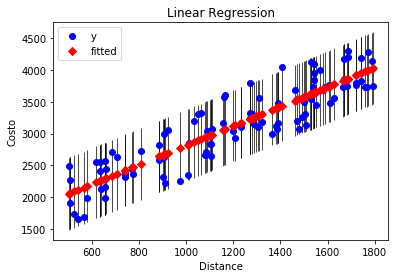

In [18]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(model, 1, ax=ax)
ax.set_ylabel("Costo")
ax.set_xlabel("Distance")
ax.set_title("Linear Regression")
plt.show()

 #  <font color= #007FFF> Regresion Multiple - Simple </font>

In [19]:
x2=df[['Dist','Wgt']]

X=sm.add_constant(x2)

model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     218.9
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           1.10e-36
Time:                        22:41:13   Log-Likelihood:                -704.55
No. Observations:                 100   AIC:                             1415.
Df Residuals:                      97   BIC:                             1423.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1354.4908    134.410     10.077      0.000    1087.724    1621.258
Dist           1.5384      0.074     20.850      0.000       1.392       1.685
Wgt           -0.0030      0.004     -0.742      0.460      -0.011       0.005
==============================================================================
Omnibus:                       10.932   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                4.260
Skew:                           0.203   Prob(JB):                        0.119
Kurtosis:                       2.074   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

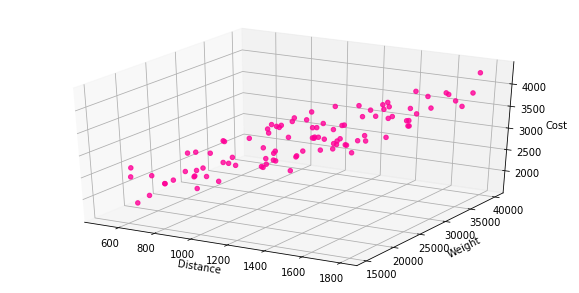

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Dist'],df['Wgt'],df['Cpl'],c='#ff0097', marker='o', alpha=0.8)
    
ax.set_xlabel('Distance')
ax.set_ylabel('Weight')
ax.set_zlabel('Cost')
plt.show()

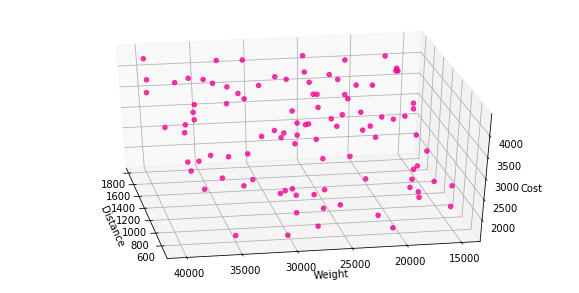

In [21]:
# rotar (x-y, Z) en grados.
ax.view_init(35, 170)
fig

 #  <font color= #007FFF> Dummy Variables </font>

In [22]:
df['Dummy'] = np.where(df['Equpt']=='DRY', df['Dist'].astype(float), 0)
df.head()

,Cpl,Dist,LdTime,TrlLng,Wgt,Equpt,Dummy
Id,,,,,,,
1,3692,1579,1,53,20559,DRY,1579.0
2,3279,1298,12,48,17025,REF,0.0
3,3120,1382,11,48,26735,DRY,1382.0
4,3205,1033,1,53,26175,DRY,1033.0
5,3188,1320,3,53,17994,DRY,1320.0


In [23]:
x3=df[['Dist','Dummy']]
y2 = df.Cpl.values

In [24]:
X_3=sm.add_constant(x3)

model=sm.OLS(y2,X_3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     222.1
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           6.22e-37
Time:                        22:41:13   Log-Likelihood:                -703.96
No. Observations:                 100   AIC:                             1414.
Df Residuals:                      97   BIC:                             1422.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1283.0112     92.278     13.904      0.000    1099.864    1466.158
Dist           1.5547      0.075     20.756      0.000       1.406       1.703
Dummy         -0.0590      0.045     -1.304      0.195      -0.149       0.031
==============================================================================
Omnibus:                        4.513   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                3.072
Skew:                           0.265   Prob(JB):                        0.215
Kurtosis:                       2.324   Cond. No.                     4.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

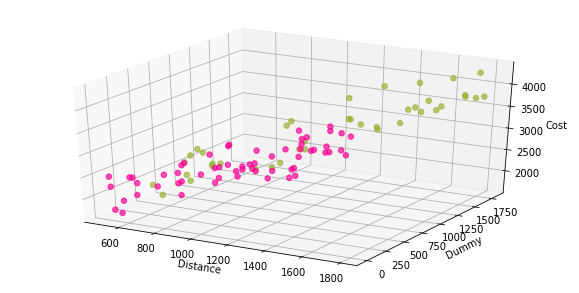

In [25]:
# 2 colores deacuerdo a los cluster.
a=df.loc[df['Dummy'] != 0]
x_1=a['Dist']
y_1=a['Dummy']
z_1=a['Cpl']

b=df.loc[df['Dummy'] == 0]
x_2=b['Dist']
y_2=b['Dummy']
z_2=b['Cpl']

fig = plt.figure(figsize=(10,5))
ax2 = fig.add_subplot(111, projection='3d')


ax2.scatter(x_1,y_1,z_1,c='#99b433', marker='o', alpha=0.7,s=30)
ax2.scatter(x_2,y_2,z_2,c='#ff0097', marker='o', alpha=0.7,s=30)

ax2.set_xlabel('Distance')
ax2.set_ylabel('Dummy')
ax2.set_zlabel('Cost')

#%matplotlib notebook
fig

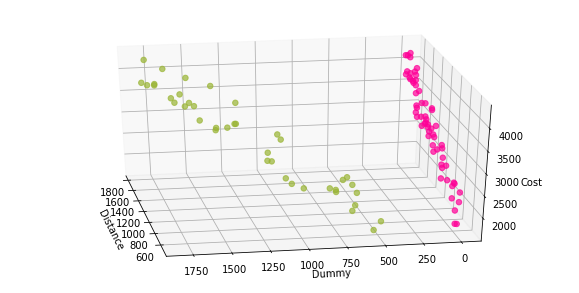

In [26]:
# rotar (x-y, Z) en grados.
ax2.view_init(30, 170)
fig

In [27]:
df['Equpt'].unique()

array(['DRY', 'REF'], dtype=object)

In [28]:
dummy=df['Equpt'].str.get_dummies()

In [29]:
df.drop(['Dummy','Equpt'],axis=1,inplace=True)

In [30]:
df.head(2)

,Cpl,Dist,LdTime,TrlLng,Wgt
Id,,,,,
1,3692,1579,1,53,20559
2,3279,1298,12,48,17025


In [31]:
NewData=pd.concat([df, dummy.reindex(df.index)], axis=1)
NewData.head(8)

,Cpl,Dist,LdTime,TrlLng,Wgt,DRY,REF
Id,,,,,,,
1,3692,1579,1,53,20559,1,0
2,3279,1298,12,48,17025,0,1
3,3120,1382,11,48,26735,1,0
4,3205,1033,1,53,26175,1,0
5,3188,1320,3,53,17994,1,0
6,2835,1103,9,53,32206,1,0
7,2364,743,1,48,18588,1,0
8,2434,772,9,53,16263,0,1


 #  <font color= #007FFF> Principal Component Analysis </font>

El análisis de componentes principales, o PCA, es un método de reducción de dimensionalidad que a menudo se usa para reducir la dimensionalidad de grandes conjuntos de datos, al transformar un gran conjunto de variables en uno más pequeño que aún contiene la mayor parte de la información en el conjunto grande.

La reducción de la cantidad de variables de un conjunto de datos naturalmente es a expensas de la precisión, pero el truco en la reducción de la dimensionalidad es cambiar un poco la precisión por la simplicidad. Debido a que los conjuntos de datos más pequeños son más fáciles de explorar y visualizar y hacen que el análisis de datos sea mucho más fácil y rápido para los algoritmos de aprendizaje automático sin que se procesen variables extrañas.


**En resumen, la idea de PCA es simple: reduzca el número de variables de un conjunto de datos, al tiempo que conserva la mayor cantidad de información posible.**

In [32]:
NewData.corr()

,Cpl,Dist,LdTime,TrlLng,Wgt,DRY,REF
Cpl,1.000000,0.904213,-0.093314,0.141567,0.075855,-0.090218,0.090218
Dist,0.904213,1.000000,0.004663,0.174593,0.119109,-0.029921,0.029921
LdTime,-0.093314,0.004663,1.000000,-0.040163,0.066092,0.104620,-0.104620
TrlLng,0.141567,0.174593,-0.040163,1.000000,0.006412,0.213980,-0.213980
Wgt,0.075855,0.119109,0.066092,0.006412,1.000000,0.006555,-0.006555
DRY,-0.090218,-0.029921,0.104620,0.213980,0.006555,1.000000,-1.000000
REF,0.090218,0.029921,-0.104620,-0.213980,-0.006555,-1.000000,1.000000


In [33]:
X = NewData.drop('Cpl', axis=1)
y = NewData['Cpl']

In [34]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [35]:
component_=pca.explained_variance_ratio_
component_

array([  3.50107767e-01,   1.98814734e-01,   1.78994185e-01,
         1.48108596e-01,   1.23974719e-01,   3.68914063e-33])

In [36]:
component=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
component

array([  35.01,   54.89,   72.79,   87.6 ,  100.  ,  100.  ])

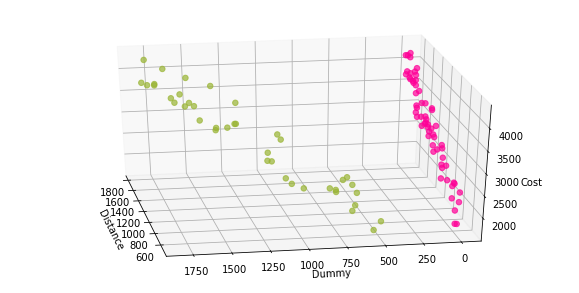

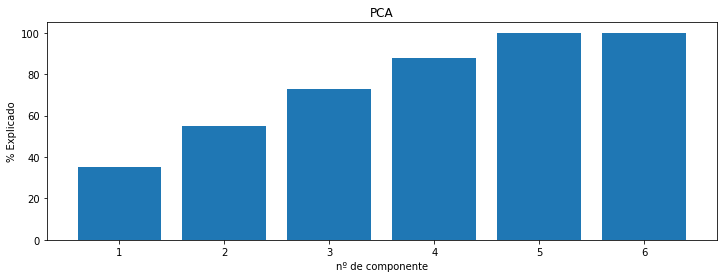

In [37]:

x=[i for i in range(1,len(component)+1)]
y=component

plt.figure(figsize=(12,4))
plt.bar(x,y)
plt.title('PCA')
plt.xlabel('nº de componente')
plt.ylabel('% Explicado')


plt.show()

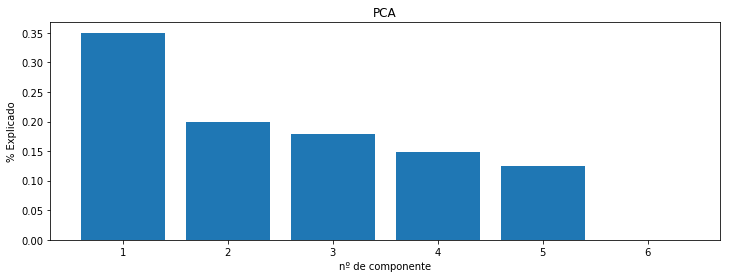

In [38]:

x=[i for i in range(1,len(component_)+1)]
y=component_

plt.figure(figsize=(12,4))
plt.bar(x,y)
plt.title('PCA')
plt.xlabel('nº de componente')
plt.ylabel('% Explicado')


plt.show()

In [39]:
from pandas.plotting import scatter_matrix

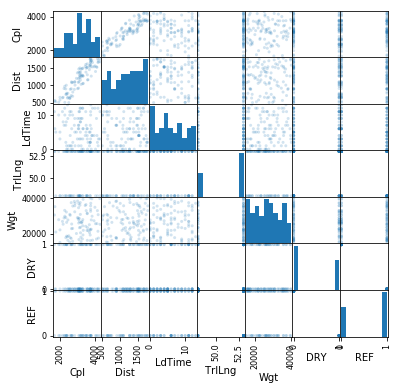

In [40]:
scatter_matrix(NewData, alpha=0.2, figsize=(6, 6), diagonal='hist')
plt.show()